# Buffers or feedbacks?

equations
$$
\frac{dx}{dt} = rx(1-x/K)-Fx^d 
$$

Potential field
$$
\frac{dx}{dt} = \frac{\partial}{\partial x} \left[-H\frac{x^{d+1}}{d+1} + \frac{r}{2}x^2-\frac{r}{3K}x^3 \right]
$$

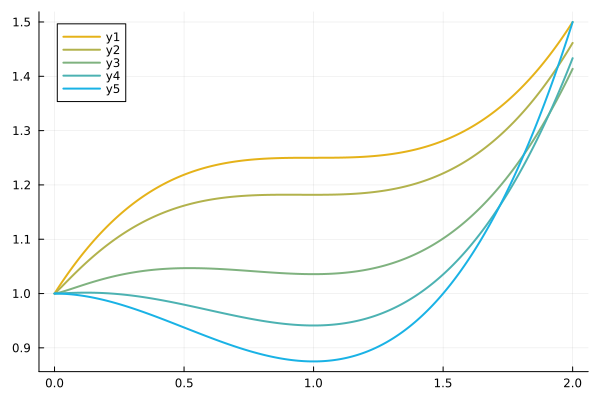

In [4]:
using Plots
r = 1.5
K = 2.0
dxdt(x,d,H) = r*x -r/K *x^2-H*x^d
P(x,d,H) = r*x^2/2 -r/K*x^3/3-H*(x^(d+1))/(d+1)
x = 0.0:0.01:2.0
d = 0.0
H = 0.75
potential = broadcast(x->P(x,d,H),x)
Plots.plot(x, 1 .- potential, color = "black",c = Colors.RGB(0.9,0.7,0.1), width = 2)
potential = broadcast(x->P(x,0.1,H),x)
Plots.plot!(x, 1 .- potential, color = "black",c = Colors.RGB(0.7,0.7,0.3), width = 2)
potential = broadcast(x->P(x,0.4,H),x)
Plots.plot!(x, 1 .- potential, color = "black",c = Colors.RGB(0.5,0.7,0.5), width = 2)
potential = broadcast(x->P(x,0.7,H),x)
Plots.plot!(x, 1 .- potential, color = "black",c = Colors.RGB(0.3,0.7,0.7), width = 2)
potential = broadcast(x->P(x,1.0,H),x)
Plots.plot!(x, 1 .- potential, color = "black",c = Colors.RGB(0.1,0.7,0.9), width = 2)

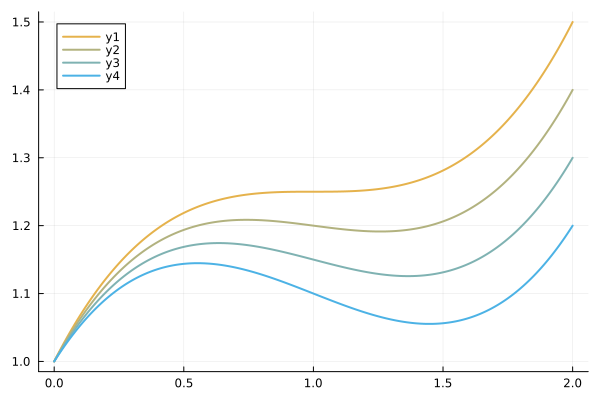

In [62]:
using Colors
potential = broadcast(x->P(x,0.0,H),x)
Plots.plot(x, 1 .- potential,c = Colors.RGB(0.9,0.7,0.3), width = 2)
potential = broadcast(x->P(x,0.0,H-0.05),x)
Plots.plot!(x, 1 .- potential,c = Colors.RGB(0.7,0.7,0.5), width = 2)
potential = broadcast(x->P(x,0.0,H-0.1),x)
Plots.plot!(x, 1 .- potential,c = Colors.RGB(0.5,0.7,0.7), width = 2)
potential = broadcast(x->P(x,0.0,H-0.15),x)
Plots.plot!(x, 1 .- potential,c = Colors.RGB(0.3,0.7,0.9), width = 2)

# Log transformed dynamics

equations
$$
\frac{dB}{dt} = rB(1-B/K)-HB^d \\
\frac{dx}{dt} = \frac{dx}{dB}\frac{dB}{dt} = \frac{1}{B} \left[rB(1-B/K)-HB^d\right]\\
\frac{dx}{dt}  = r(1-B/K)-HB^{d-1}\\
\frac{dx}{dt}  = r(1-e^x/K)-He^{(d-1)x}\\
$$

Potential field
$$
\frac{dx}{dt} = \frac{\partial}{\partial x} \left[\frac{H}{d}x^d + rx + \frac{x^2}{2K}  \right]
$$

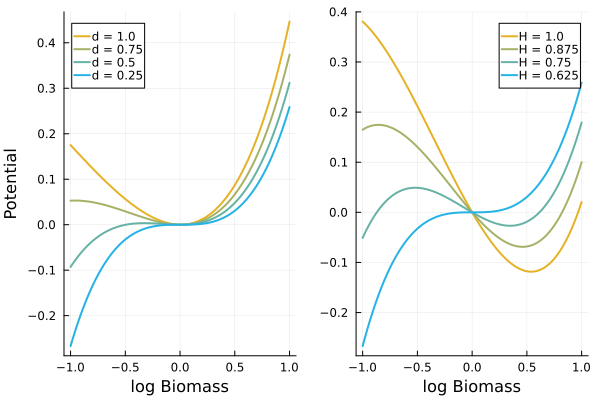

In [10]:
dxdt(x,d,H) = r-r*exp(x)/K-H*exp(x)^(d-1)
function integrate(x,f)
    F = zeros(length(f))
        
    for t in 2:length(f)
        F[t] = F[t-1] + f[t-1]*(x[t]-x[t-1])
    end
    return F
end

x = -1.0:0.01:1.0
H = 0.75
f = broadcast(x->dxdt(x,0.75,H),x);F = integrate(x,f)
p1 = Plots.plot(x, - (F .- F[x.==0]), color = "black", width = 2,c = Colors.RGB(0.9,0.7,0.15), label = "d = 1.0")
f = broadcast(x->dxdt(x,0.5,H),x);F = integrate(x,f)
Plots.plot!(p1,x, - (F .- F[x.==0]), color = "black",  width = 2,c = Colors.RGB(0.65,0.7,0.40), label = "d = 0.75")
f = broadcast(x->dxdt(x,0.25,H),x);F = integrate(x,f)
Plots.plot!(p1,x, - (F .- F[x.==0]), color = "black", width = 2,c = Colors.RGB(0.40,0.7,0.65), label = "d = 0.5")
f = broadcast(x->dxdt(x,0.0,H),x);F = integrate(x,f)
Plots.plot!(p1,x, - (F .- F[x.==0]), color = "black", width = 2,c = Colors.RGB(0.15,0.7,0.9), label = "d = 0.25",
            ylabel = "Potential")
    
f = broadcast(x->dxdt(x,0.0,0.375),x);F = integrate(x,f)
p2 = Plots.plot(x, - (F .- F[x.==0]), color = "black", width = 2,c = Colors.RGB(0.9,0.7,0.15), label = "H = 1.0")
f = broadcast(x->dxdt(x,0.0,0.5),x);F = integrate(x,f)
Plots.plot!(p2,x, - (F .- F[x.==0]), color = "black",  width = 2,c = Colors.RGB(0.65,0.7,0.40), label = "H = 0.875")
f = broadcast(x->dxdt(x,0.0,0.625),x);F = integrate(x,f)
Plots.plot!(p2,x, - (F .- F[x.==0]), color = "black", width = 2,c = Colors.RGB(0.40,0.7,0.65), label = "H = 0.75")
f = broadcast(x->dxdt(x,0.0,0.75),x);F = integrate(x,f)
Plots.plot!(p2,x, - (F .- F[x.==0]), color = "black", width = 2,c = Colors.RGB(0.15,0.7,0.9), label = "H = 0.625")
    
plot(p1,p2,xlabel="log Biomass")

# Potential well with the "natural" feedback
equations
$$
\frac{dx}{dt} = rx\left(1-\frac{x}{K}\right)- H(x) \\
H(x)=  Min\left\{\frac{cx^k}{h+x^k}, F\left(\frac{x}{B_{MSY}}\right)^d \right\}
$$


In [693]:
function Harvest(x,c,k,d,h,F,Bmsy)
    H1 = c*x^k/(1 + h*x^k) ; H2 = F*(x/Bmsy)^d
    H = [H1,H2]
    return H[argmin(H)]
end 

K = 2.0
Bmsy = K/2
r = 1.0
c = 4.5#6.5
k = 2.0
d = 0.0
h = 7.0#12
F = 1.0
dxdt(x,r,K,c,k,d,h,F) = r-r*exp(x)/K- Harvest(exp(x),c,k,d,h,F,K/2)/exp(x)
dBdt(B,r,K,c,k,d,h,F) = r*B*(1-B/K)- Harvest(B,c,k,d,h,F,K/2)

dBdt (generic function with 1 method)

## Derivitives

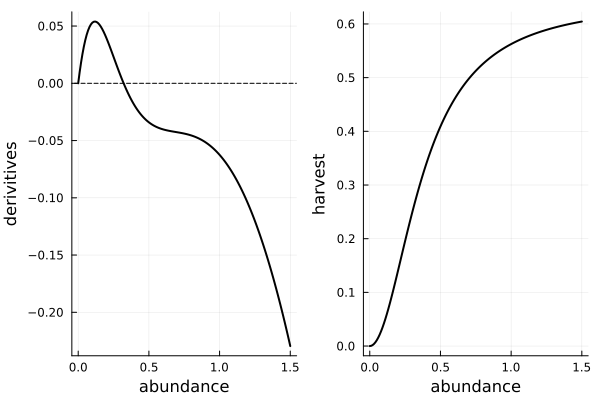

In [694]:
x = 0.0:0.01:1.5
h_ = broadcast(x->Harvest(x,c,k,d,h,F,Bmsy),x) 
f = broadcast(x->dBdt(x,r,K,c,k,d,h,F),x)
p1 = Plots.plot(x,f, color = "black", width = 2, label = "")
Plots.hline!(p1,[0.0], color = "black", linestyle = :dash, ylabel = "derivitives", xlabel = "abundance", label = "")
p2 = Plots.plot(x,h_, ylabel = "harvest", xlabel = "abundance", color = "black", width = 2, label = "")
plot(p1,p2)

# Simulations

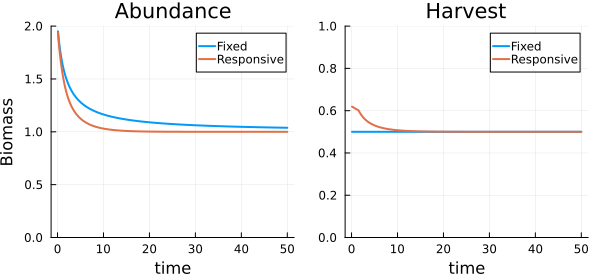

In [747]:
using Distributions
function simulation(B0,r,K,c,k,d,h,F,sigma;dt=0.1,T = 100)
    B=[];H=[];t=[]
    Bt = B0
    for tau in 1:round(Int,T/dt)
        Bt += dt*dBdt(Bt,r,K,c,k,d,h,F) + dt*Bt*rand(Normal(0,sigma))
        push!(B,Bt);push!(H,Harvest(Bt,c,k,d,h,F,K/2));push!(t,dt*tau)
    end
    return return t,B,H
end

error = 0.1;T = 50
F = 0.5; t,B1,H1=simulation(K,r,K,c,k,d,h,F,0.0;dt=0.1,T = T)
p1=Plots.plot(t,B1,fillalpha=0.25,width=2,label = "Fixed")
p2=Plots.plot(t,H1,fillalpha=0.25,width=2,label = "Fixed")
F = 0.5; t,B1,H1=simulation(K,r,K,c,k,0.5,h,F,0.0;dt=0.1,T = T)
Plots.plot!(p1,t,B1,fillalpha=0.5, ylabel = "Biomass",width=2,label = "Responsive", ylims = (0,2), title = "Abundance")
Plots.plot!(p2,t,H1,fillalpha=0.5,width=2,label = "Responsive", ylims = (0,1), title = "Harvest")
plot(p1,p2, xlabel = "time",size = (600,274))

In [749]:
using Distributions
function simulation(B0,r,K,c,k,d,h,F,sigma;dt=0.1,T = 100)
    B=[];H=[];t=[]
    Bt = B0
    for tau in 1:round(Int,T/dt)
        Bt += dt*dBdt(Bt,r,K,c,k,d,h,F) + dt*Bt*rand(Normal(0,sigma))
        push!(B,Bt);push!(H,Harvest(Bt,c,k,d,h,F,K/2));push!(t,dt*tau)
    end
    return return t,B,H
end

error = 0.1;T = 40
F = 0.48; t,B1,H1=simulation(K,r,K,c,k,d,h,F*(1+error),0.0;dt=0.1,T = T)
F = 0.48; t,B2,H2=simulation(K,r,K,c,k,d,h,F,0.0;dt=0.1,T = T)
F = 0.48; t,B3,H3=simulation(K,r,K,c,k,d,h,F*(1-error),0.0;dt=0.1,T = T)
p1=Plots.plot(t,B2, ribbon=(B2.-B3,B1.-B2),fillalpha=0.25,width=2,label = "Fixed")
p3=Plots.plot(t,H2,fillalpha=0.25,width=2,label = "",c=1)
Plots.plot!(p3,t,H1,fillalpha=0.25,width=1,label = "",c=1)
Plots.plot!(p3,t,H3,fillalpha=0.25,width=1,label = "",c=1)
#Plots.plot(p3,t,H1, width=2,label = "Fixed", c=1)
F = 0.48; t,B1,H1=simulation(K,r,K,c,k,1.0,h,F*(1+error),0.0;dt=0.1,T = T)
F = 0.48; t,B2,H2=simulation(K,r,K,c,k,1.0,h,F,0.0;dt=0.1,T = T)
F = 0.48; t,B3,H3=simulation(K,r,K,c,k,1.0,h,F*(1-error),0.0;dt=0.1,T = T)
Plots.plot!(p1,t,B2, ribbon=(B2.-B3,B1.-B2),fillalpha=0.5, ylabel = "Abundance",width=2,label = "Responsive")
Plots.plot!(p3,t,H2,fillalpha=0.5, c = 2, ylabel = "Abundance",width=2,label = "")
Plots.plot!(p3,t,H1,fillalpha=0.25,width=1,label = "",c=2)
Plots.plot!(p3,t,H3,fillalpha=0.25,width=1,label = "",c=2)
nothing

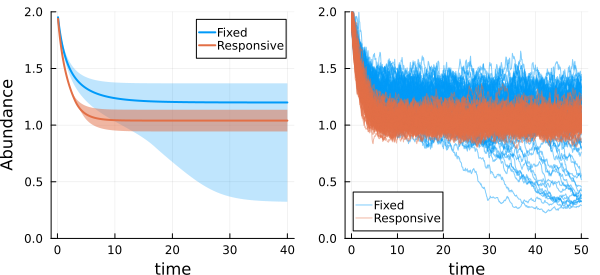

In [751]:
sigma = 0.23;T = 50;Nsims=100

F = 0.48; t,B1,H1=simulation(K,r,K,c,k,d,h,F,sigma ;dt=0.1,T = T)
p2 = Plots.plot(t,B1,c=1,label = "Fixed",alpha = 0.5)
p4 = Plots.plot(t,H1,c=1,label = "",alpha = 0.5)
for i in 1:Nsims
    F = 0.48; t,B2,H2=simulation(K,r,K,c,k,d,h,F,sigma ;dt=0.1,T = T)
    Plots.plot!(p2,t,B2,c=1,label = "",alpha = 0.5)
    #Plots.plot!(p4,t,H2,c=1,label = "",alpha = 0.5)
end 


F = 0.48; t,B1,H1=simulation(K,r,K,c,k,0.5,h,F,sigma ;dt=0.1,T = T)
Plots.plot!(p2,t,B1,c=2,label = "Responsive",alpha = 0.5)
Plots.plot!(p4,t,H1,c=2,label = "",alpha = 0.5)
for i in 1:Nsims
    F = 0.48; t,B2,H2=simulation(K,r,K,c,k,1.0,h,F,sigma ;dt=0.1,T = T)
    Plots.plot!(p2,t,B2,c=2,label = "",alpha = 0.5)
    Plots.plot!(p4,t,H2,c=2,label = "",alpha = 0.5)
end 

for i in 1:Nsims
    F = 0.48; t,B2,H2=simulation(K,r,K,c,k,d,h,F,sigma ;dt=0.1,T = T)
    Plots.plot!(p4,t,H2,c=1,label = "",alpha = 0.5)
end 

plot(p1,p2,xlabel = "time", size = (600,275), ylims = (0,2))

## Potential wells

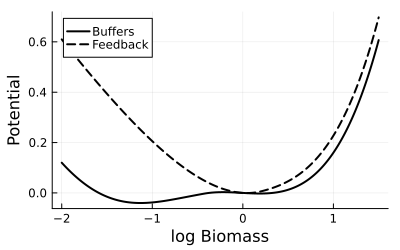

In [763]:
K = 2.0;x = -2.0:0.01:1.5;F = 0.48;d = 0.0;f = broadcast(x->dxdt(x,r,K,c,k,d,h,F),x);f_ = integrate(x,f)
p1 = Plots.plot(x, -(f_.-f_[x.==0]), width = 2,color="black", ylabel = "Potential", label = "Buffers")
    
K = 2.0;x = -2.0:0.01:1.5;F = 0.48;d = 0.0;f = broadcast(x->dxdt(x,r,K,c,k,1.0,h,F),x);f_ = integrate(x,f)
Plots.plot!(p1,x, -(f_.-f_[x.==0]), width = 2,color="black", label = "Feedback", linestyle = :dash,legend = :topleft)
    
plot(p1,xlabel = "log Biomass", size = (400,250))

## Robustness

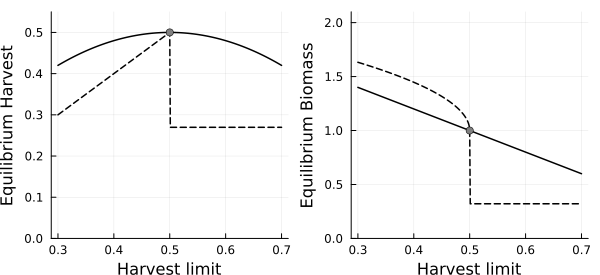

In [791]:
function equilibrium(r,K,c,k,d,h,F;dt = 0.1)
    B = K;B0 = 100
    dB = dBdt(B,r,K,c,k,d,h,F)
    while abs(dB) > 0.0000001
        dB =dBdt(B,r,K,c,k,d,h,F)
        B+= dt*dB
    end 
    return B, Harvest(B,c,k,d,h,F,K/2)
end 
F = 0.5;d = 1.0;K = 2
Fvals = 0.3:0.001:0.7
Hvals = broadcast(F -> equilibrium(r,K,c,k,d,h,F;dt = 0.01)[2], Fvals)
Bvals = broadcast(F -> equilibrium(r,K,c,k,d,h,F;dt = 0.01)[1], Fvals)
p1=Plots.plot(Fvals,Hvals,color = "black", width=1.5,ylims = (0,0.55),  label = "", ylabel = "Equilibrium Harvest")
p2 = Plots.plot(Fvals,Bvals,color = "black", width=1.5,ylims = (0,2.1), xlabel = "feedback strength (d)", label = "", ylabel = "Equilibrium Biomass")
d = 0.0
Hvals = broadcast(F -> equilibrium(r,K,c,k,d,h,F;dt = 0.01)[2], Fvals)
Bvals = broadcast(F -> equilibrium(r,K,c,k,d,h,F;dt = 0.01)[1], Fvals)
Plots.plot!(p1,Fvals, Hvals,color = "black", width=1.5,ylims = (0,0.55), label = "",linestyle = :dash)
Plots.plot!(p2,Fvals, Bvals,color = "black", width=1.5, xlabel = "Harvest buffer (%)",ylims = (0,2.1), label = "",linestyle = :dash)
Plots.scatter!(p1,[0.5],[0.5],color = "grey",linestyle = :dash,label ="")
Plots.scatter!(p2,[0.5],[1.0],color = "grey",linestyle = :dash,label ="")
plot(p1,p2, size = (600,275), xlabel = "Harvest limit")

## Potential wells harvest limits

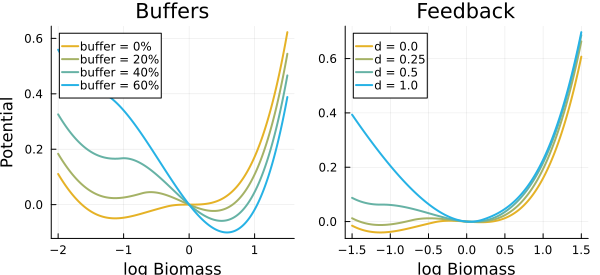

In [690]:
K = 2.0;x = -2.0:0.01:1.5
F = 0.5;d = 0.0;f = broadcast(x->dxdt(x,r,K,c,k,d,h,F),x);f_ = integrate(x,f)
p1=Plots.plot(x, -(f_.-f_[x.==0]), width = 2,c = Colors.RGB(0.9,0.7,0.15), label = "buffer = 0%")
F = 0.4;d = 0.0;f = broadcast(x->dxdt(x,r,K,c,k,d,h,F),x);f_ = integrate(x,f)
Plots.plot!(p1,x, -(f_.-f_[x.==0]), width = 2,c = Colors.RGB(0.65,0.7,0.4), label = "buffer = 20%")
F = 0.3;d = 0.0;f = broadcast(x->dxdt(x,r,K,c,k,d,h,F),x);f_ = integrate(x,f)
Plots.plot!(p1,x, -(f_.-f_[x.==0]), width = 2,c = Colors.RGB(0.4,0.7,0.65), label = "buffer = 40%")
F = 0.2;d = 0.0;f = broadcast(x->dxdt(x,r,K,c,k,d,h,F),x);f_ = integrate(x,f)
Plots.plot!(p1,x, -(f_.-f_[x.==0]), width = 2,c = Colors.RGB(0.15,0.7,0.9), 
            ylabel = "Potential", title = "Buffers", label = "buffer = 60%")
    

K = 2.0;x = -1.5:0.01:1.5
F = 0.48;d = 0.0;f = broadcast(x->dxdt(x,r,K,c,k,d,h,F),x);f_ = integrate(x,f)
p2 = Plots.plot(x, -(f_.-f_[x.==0]), width = 2,c = Colors.RGB(0.9,0.7,0.15), label = "d = 0.0")
F = 0.48;d = 0.25;f = broadcast(x->dxdt(x,r,K,c,k,d,h,F),x);f_ = integrate(x,f)
Plots.plot!(p2,x, -(f_.-f_[x.==0]), width = 2,c = Colors.RGB(0.65,0.7,0.4), label = "d = 0.25")
F = 0.48;d = 0.5;f = broadcast(x->dxdt(x,r,K,c,k,d,h,F),x);f_ = integrate(x,f)
Plots.plot!(p2,x, -(f_.-f_[x.==0]), width = 2,c = Colors.RGB(0.4,0.7,0.65), label = "d = 0.5")
F = 0.48;d = 1.0;f = broadcast(x->dxdt(x,r,K,c,k,d,h,F),x);f_ = integrate(x,f)
Plots.plot!(p2,x, -(f_.-f_[x.==0]), width = 2,c = Colors.RGB(0.15,0.7,0.9), title = "Feedback", label = "d = 1.0")
    
plot(p1,p2, xlabel = "log Biomass", size = (600,275))

## harvest level trade off

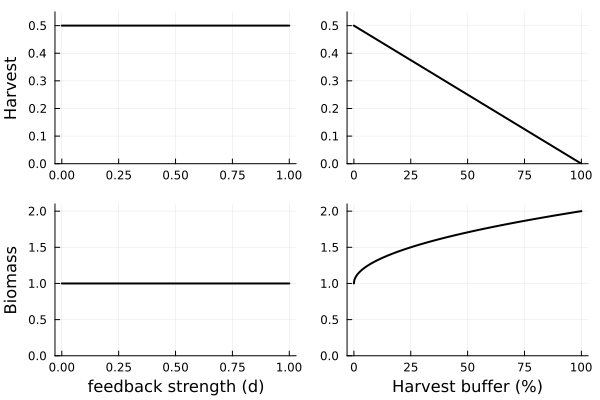

In [557]:
function equilibrium(r,K,c,k,d,h,F;dt = 0.1)
    B = K;B0 = 100
    dB = dBdt(B,r,K,c,k,d,h,F)
    while abs(dB) > 0.0000001
        dB =dBdt(B,r,K,c,k,d,h,F)
        B+= dt*dB
    end 
    return B, Harvest(B,c,k,d,h,F,K/2)
end 
F = 0.5;d = 1.0;K = 2
dvals = 0.0:0.1:1.0
Hvals = broadcast(d -> equilibrium(r,K,c,k,d,h,F;dt = 0.01)[2], dvals)
Bvals = broadcast(d -> equilibrium(r,K,c,k,d,h,F;dt = 0.01)[1], dvals)
p1=Plots.plot(dvals,Hvals,color = "black", width=2,ylims = (0,0.55),  label = "", ylabel = "Harvest")
p3 = Plots.plot(dvals,Bvals,color = "black", width=2,ylims = (0,2.1), xlabel = "feedback strength (d)", label = "", ylabel = "Biomass")
F = 0.5;d = 0.0;K = 2
Fvals = 0.0:0.001:0.5
Hvals = broadcast(F -> equilibrium(r,K,c,k,d,h,F;dt = 0.01)[2], Fvals)
Bvals = broadcast(F -> equilibrium(r,K,c,k,d,h,F;dt = 0.01)[1], Fvals)
p2=Plots.plot( 100 * (F .- Fvals) / F, Hvals,color = "black", width=2,ylims = (0,0.55), label = "")
p4 = Plots.plot( 100 * (F .- Fvals) / F, Bvals,color = "black", width=2, xlabel = "Harvest buffer (%)",ylims = (0,2.1), label = "")
plot(p1,p2,p3,p4)

## Potential wells harvest limits effect of harvest rate

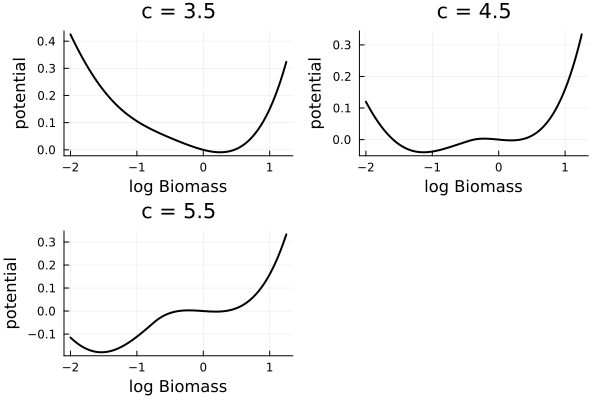

In [36]:
K = 2.0;x = -2.0:0.01:1.25
F=0.48;d=0.0;c=3.5;r=1.0;f = broadcast(x->dxdt(x,r,K,c,k,d,h,F),x);f_ = integrate(x,f)
p1 = Plots.plot(x, -(f_.-f_[x.==0]), width = 2, color = "black",label ="",title = "c = 3.5")
F=0.48;d=0.0;c=4.5;r=1.0;f = broadcast(x->dxdt(x,r,K,c,k,d,h,F),x);f_ = integrate(x,f)
p2 = Plots.plot(x, -(f_.-f_[x.==0]), width = 2, color = "black",label ="",title = "c = 4.5")
F=0.48;d=0.0;c=5.5;r=1.0;f = broadcast(x->dxdt(x,r,K,c,k,d,h,F),x);f_ = integrate(x,f)
p3 = Plots.plot(x, -(f_.-f_[x.==0]), width = 2, color = "black",label ="" ,title = "c = 5.5")
plot(p1,p2,p3,ylabel="potential",xlabel = "log Biomass")

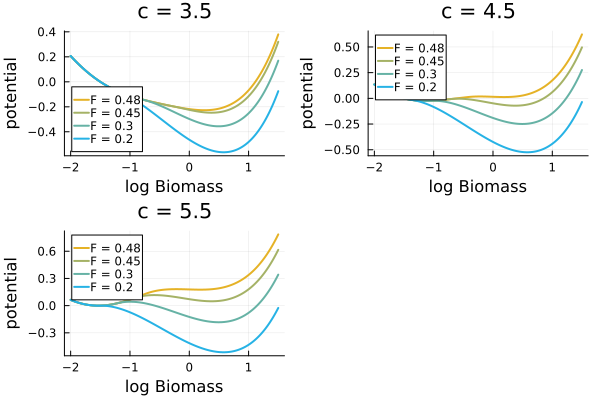

In [37]:
K = 2.0;x = -2.0:0.01:1.5;x0 = -1.5
F=0.48;d=0.0;c=3.5;r=1.0;f = broadcast(x->dxdt(x,r,K,c,k,d,h,F),x);f_ = integrate(x,f)
p1 = Plots.plot(x, -(f_.-f_[x.==x0]), width = 2, color = "black",label ="F = 0.48",c = Colors.RGB(0.9,0.7,0.15),title = "c = 3.5")
F=0.48;d=0.0;c=4.5;r=1.0;f = broadcast(x->dxdt(x,r,K,c,k,d,h,F),x);f_ = integrate(x,f)
p2 = Plots.plot(x, -(f_.-f_[x.==x0]), width = 2, color = "black",label ="F = 0.48",c = Colors.RGB(0.9,0.7,0.15),title = "c = 4.5")
F=0.48;d=0.0;c=5.5;r=1.0;f = broadcast(x->dxdt(x,r,K,c,k,d,h,F),x);f_ = integrate(x,f)
p3 = Plots.plot(x, -(f_.-f_[x.==x0]), width = 2, color = "black",label ="F = 0.48" ,c = Colors.RGB(0.9,0.7,0.15),title = "c = 5.5")

F=0.4;d=0.0;c=3.5;r=1.0;f = broadcast(x->dxdt(x,r,K,c,k,d,h,F),x);f_ = integrate(x,f)
Plots.plot!(p1,x, -(f_.-f_[x.==x0]), width = 2, color = "black",label ="F = 0.45",c = Colors.RGB(0.65,0.7,0.4))
F=0.4;d=0.0;c=4.5;r=1.0;f = broadcast(x->dxdt(x,r,K,c,k,d,h,F),x);f_ = integrate(x,f)
Plots.plot!(p2,x, -(f_.-f_[x.==x0]), width = 2, color = "black",label ="F = 0.45",c = Colors.RGB(0.65,0.7,0.4))
F=0.4;d=0.0;c=5.5;r=1.0;f = broadcast(x->dxdt(x,r,K,c,k,d,h,F),x);f_ = integrate(x,f)
Plots.plot!(p3,x, -(f_.-f_[x.==x0]), width = 2, color = "black",label ="F = 0.45" ,c = Colors.RGB(0.65,0.7,0.4))

F=0.3;d=0.0;c=3.5;r=1.0;f = broadcast(x->dxdt(x,r,K,c,k,d,h,F),x);f_ = integrate(x,f)
Plots.plot!(p1,x, -(f_.-f_[x.==x0]), width = 2, color = "black",label ="F = 0.3",c = Colors.RGB(0.4,0.7,0.65))
F=0.3;d=0.0;c=4.5;r=1.0;f = broadcast(x->dxdt(x,r,K,c,k,d,h,F),x);f_ = integrate(x,f)
Plots.plot!(p2,x, -(f_.-f_[x.==x0]), width = 2, color = "black",label ="F = 0.3",c = Colors.RGB(0.4,0.7,0.65))
F=0.3;d=0.0;c=5.5;r=1.0;f = broadcast(x->dxdt(x,r,K,c,k,d,h,F),x);f_ = integrate(x,f)
Plots.plot!(p3,x, -(f_.-f_[x.==x0]), width = 2, color = "black",label ="F = 0.3",c = Colors.RGB(0.4,0.7,0.65))
    
F=0.2;d=0.0;c=3.5;r=1.0;f = broadcast(x->dxdt(x,r,K,c,k,d,h,F),x);f_ = integrate(x,f)
Plots.plot!(p1,x, -(f_.-f_[x.==x0]), width = 2, color = "black",label ="F = 0.2",c = Colors.RGB(0.15,0.7,0.9))
F=0.2;d=0.0;c=4.5;r=1.0;f = broadcast(x->dxdt(x,r,K,c,k,d,h,F),x);f_ = integrate(x,f)
Plots.plot!(p2,x, -(f_.-f_[x.==x0]), width = 2, color = "black",label ="F = 0.2",c = Colors.RGB(0.15,0.7,0.9))
F=0.2;d=0.0;c=5.5;r=1.0;f = broadcast(x->dxdt(x,r,K,c,k,d,h,F),x);f_ = integrate(x,f)
Plots.plot!(p3,x, -(f_.-f_[x.==x0]), width = 2, color = "black",label ="F = 0.2",c = Colors.RGB(0.15,0.7,0.9))
plot(p1,p2,p3,ylabel="potential",xlabel = "log Biomass")

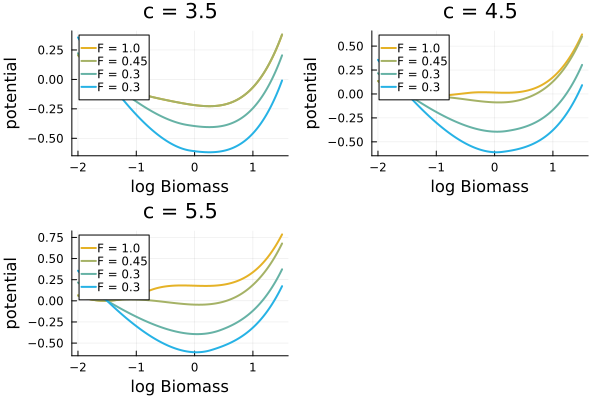

In [38]:
K = 2.0;x = -2.0:0.01:1.5
F=0.48;d=0.0;c=3.5;r=1.0;f = broadcast(x->dxdt(x,r,K,c,k,d,h,F),x);f_ = integrate(x,f)
p1 = Plots.plot(x, -(f_.-f_[x.==x0]), width = 2, color = "black",label ="F = 1.0",c = Colors.RGB(0.9,0.7,0.15),title = "c = 3.5")
F=0.48;d=0.0;c=4.5;r=1.0;f = broadcast(x->dxdt(x,r,K,c,k,d,h,F),x);f_ = integrate(x,f)
p2 = Plots.plot(x, -(f_.-f_[x.==x0]), width = 2, color = "black",label ="F = 1.0",c = Colors.RGB(0.9,0.7,0.15),title = "c = 4.5")
F=0.48;d=0.0;c=5.5;r=1.0;f = broadcast(x->dxdt(x,r,K,c,k,d,h,F),x);f_ = integrate(x,f)
p3 = Plots.plot(x, -(f_.-f_[x.==x0]), width = 2, color = "black",label ="F = 1.0" ,c = Colors.RGB(0.9,0.7,0.15),title = "c = 5.5")

F=0.48;d=0.5;c=3.5;r=1.0;f = broadcast(x->dxdt(x,r,K,c,k,d,h,F),x);f_ = integrate(x,f)
Plots.plot!(p1,x, -(f_.-f_[x.==x0]), width = 2, color = "black",label ="F = 0.45",c = Colors.RGB(0.65,0.7,0.4))
F=0.48;d=0.5;c=4.5;r=1.0;f = broadcast(x->dxdt(x,r,K,c,k,d,h,F),x);f_ = integrate(x,f)
Plots.plot!(p2,x, -(f_.-f_[x.==x0]), width = 2, color = "black",label ="F = 0.45",c = Colors.RGB(0.65,0.7,0.4))
F=0.48;d=0.5;c=5.5;r=1.0;f = broadcast(x->dxdt(x,r,K,c,k,d,h,F),x);f_ = integrate(x,f)
Plots.plot!(p3,x, -(f_.-f_[x.==x0]), width = 2, color = "black",label ="F = 0.45" ,c = Colors.RGB(0.65,0.7,0.4))

F=0.48;d=1.0;c=3.5;r=1.0;f = broadcast(x->dxdt(x,r,K,c,k,d,h,F),x);f_ = integrate(x,f)
Plots.plot!(p1,x, -(f_.-f_[x.==x0]), width = 2, color = "black",label ="F = 0.3",c = Colors.RGB(0.4,0.7,0.65))
F=0.48;d=1.0;c=4.5;r=1.0;f = broadcast(x->dxdt(x,r,K,c,k,d,h,F),x);f_ = integrate(x,f)
Plots.plot!(p2,x, -(f_.-f_[x.==x0]), width = 2, color = "black",label ="F = 0.3",c = Colors.RGB(0.4,0.7,0.65))
F=0.48;d=1.0;c=5.5;r=1.0;f = broadcast(x->dxdt(x,r,K,c,k,d,h,F),x);f_ = integrate(x,f)
Plots.plot!(p3,x, -(f_.-f_[x.==x0]), width = 2, color = "black",label ="F = 0.3",c = Colors.RGB(0.4,0.7,0.65))
    
F=0.48;d=1.5;c=3.5;r=1.0;f = broadcast(x->dxdt(x,r,K,c,k,d,h,F),x);f_ = integrate(x,f)
Plots.plot!(p1,x, -(f_.-f_[x.==x0]), width = 2, color = "black",label ="F = 0.3",c = Colors.RGB(0.15,0.7,0.9))
F=0.48;d=1.5;c=4.5;r=1.0;f = broadcast(x->dxdt(x,r,K,c,k,d,h,F),x);f_ = integrate(x,f)
Plots.plot!(p2,x, -(f_.-f_[x.==x0]), width = 2, color = "black",label ="F = 0.3",c = Colors.RGB(0.15,0.7,0.9))
F=0.48;d=1.5;c=5.5;r=1.0;f = broadcast(x->dxdt(x,r,K,c,k,d,h,F),x);f_ = integrate(x,f)
Plots.plot!(p3,x, -(f_.-f_[x.==x0]), width = 2, color = "black",label ="F = 0.3",c = Colors.RGB(0.15,0.7,0.9))
plot(p1,p2,p3,ylabel="potential",xlabel = "log Biomass",legend = :topleft)

## Potential wells harvest limits effect of productivity

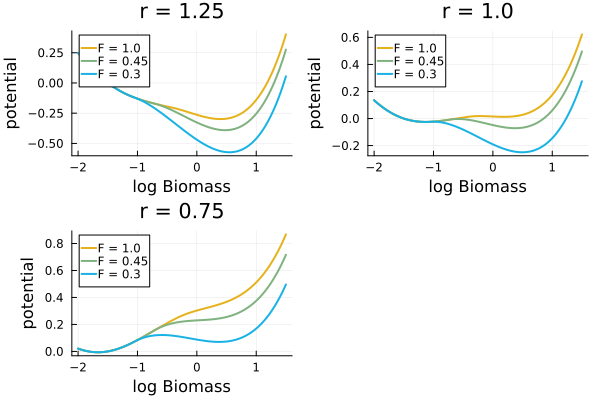

In [40]:
K = 2.0;x = -2.0:0.01:1.5
F=0.48;d=0.0;c=4.5;r=1.25;f = broadcast(x->dxdt(x,r,K,c,k,d,h,F),x);f_ = integrate(x,f)
p1 = Plots.plot(x, -(f_.-f_[x.==x0]), width = 2, color = "black",label ="F = 1.0",c = Colors.RGB(0.9,0.7,0.11),title = "r = 1.25")
F=0.48;d=0.0;c=4.5;r=1.0;f = broadcast(x->dxdt(x,r,K,c,k,d,h,F),x);f_ = integrate(x,f)
p2 = Plots.plot(x, -(f_.-f_[x.==x0]), width = 2, color = "black",label ="F = 1.0",c = Colors.RGB(0.9,0.7,0.11),title = "r = 1.0")
F=0.5;d=0.0;c=4.5;r=0.75;f = broadcast(x->dxdt(x,r,K,c,k,d,h,F),x);f_ = integrate(x,f)
p3 = Plots.plot(x, -(f_.-f_[x.==x0]), width = 2, color = "black",label ="F = 1.0" ,c = Colors.RGB(0.9,0.7,0.11),title = "r = 0.75")

F=0.4;d=0.0;c=4.5;r=1.25;f = broadcast(x->dxdt(x,r,K,c,k,d,h,F),x);f_ = integrate(x,f)
Plots.plot!(p1,x, -(f_.-f_[x.==x0]), width = 2, color = "black",label ="F = 0.45",c = Colors.RGB(0.5,0.7,0.5))
F=0.4;d=0.0;c=4.5;r=1.0;f = broadcast(x->dxdt(x,r,K,c,k,d,h,F),x);f_ = integrate(x,f)
Plots.plot!(p2,x, -(f_.-f_[x.==x0]), width = 2, color = "black",label ="F = 0.45",c = Colors.RGB(0.5,0.7,0.5))
F=0.4;d=0.0;c=4.5;r=0.75;f = broadcast(x->dxdt(x,r,K,c,k,d,h,F),x);f_ = integrate(x,f)
Plots.plot!(p3,x, -(f_.-f_[x.==x0]), width = 2, color = "black",label ="F = 0.45" ,c = Colors.RGB(0.5,0.7,0.5))

F=0.3;d=0.0;c=4.5;r=1.25;f = broadcast(x->dxdt(x,r,K,c,k,d,h,F),x);f_ = integrate(x,f)
Plots.plot!(p1,x, -(f_.-f_[x.==x0]), width = 2, color = "black",label ="F = 0.3",c = Colors.RGB(0.1,0.7,0.9))
F=0.3;d=0.0;c=4.5;r=1.0;f = broadcast(x->dxdt(x,r,K,c,k,d,h,F),x);f_ = integrate(x,f)
Plots.plot!(p2,x, -(f_.-f_[x.==x0]), width = 2, color = "black",label ="F = 0.3",c = Colors.RGB(0.1,0.7,0.9))
F=0.3;d=0.0;c=4.5;r=0.75;f = broadcast(x->dxdt(x,r,K,c,k,d,h,F),x);f_ = integrate(x,f)
Plots.plot!(p3,x, -(f_.-f_[x.==x0]), width = 2, color = "black",label ="F = 0.3",c = Colors.RGB(0.1,0.7,0.9))
plot(p1,p2,p3,ylabel="potential",xlabel = "log Biomass", legend = :topleft)

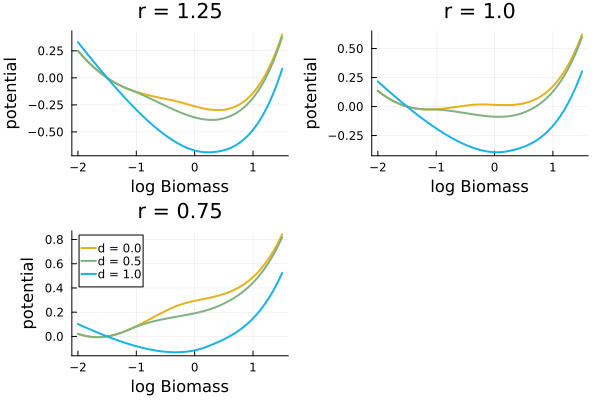

In [208]:
K = 2.0;x = -2.0:0.01:1.5
F=0.48;d=0.0;c=4.5;r=1.25;f = broadcast(x->dxdt(x,r,K,c,k,d,h,F),x);f_ = integrate(x,f)
p1 = Plots.plot(x, -(f_.-f_[x.==x0]), width = 2, color = "black",label ="d = 0.0",c = Colors.RGB(0.9,0.7,0.11),title = "r = 1.25")
F=0.48;d=0.0;c=4.5;r=1.0;f = broadcast(x->dxdt(x,r,K,c,k,d,h,F),x);f_ = integrate(x,f)
p2 = Plots.plot(x, -(f_.-f_[x.==x0]), width = 2, color = "black",label ="d = 0.0",c = Colors.RGB(0.9,0.7,0.11),title = "r = 1.0")
F=0.48;d=0.0;c=4.5;r=0.75;f = broadcast(x->dxdt(x,r,K,c,k,d,h,F),x);f_ = integrate(x,f)
p3 = Plots.plot(x, -(f_.-f_[x.==x0]), width = 2, color = "black",label ="d = 0.0" ,c = Colors.RGB(0.9,0.7,0.11),title = "r = 0.75")

F=0.48;d=0.5;c=4.5;r=1.25;f = broadcast(x->dxdt(x,r,K,c,k,d,h,F),x);f_ = integrate(x,f)
Plots.plot!(p1,x, -(f_.-f_[x.==x0]), width = 2, color = "black",label ="d = 0.5",c = Colors.RGB(0.5,0.7,0.5))
F=0.48;d=0.5;c=4.5;r=1.0;f = broadcast(x->dxdt(x,r,K,c,k,d,h,F),x);f_ = integrate(x,f)
Plots.plot!(p2,x, -(f_.-f_[x.==x0]), width = 2, color = "black",label ="d = 0.5",c = Colors.RGB(0.5,0.7,0.5))
F=0.48;d=0.5;c=4.5;r=0.75;f = broadcast(x->dxdt(x,r,K,c,k,d,h,F),x);f_ = integrate(x,f)
Plots.plot!(p3,x, -(f_.-f_[x.==x0]), width = 2, color = "black",label ="d = 0.5" ,c = Colors.RGB(0.5,0.7,0.5))

F=0.48;d=1.0;c=4.5;r=1.25;f = broadcast(x->dxdt(x,r,K,c,k,d,h,F),x);f_ = integrate(x,f)
Plots.plot!(p1,x, -(f_.-f_[x.==x0]), width = 2, color = "black",label ="d = 1.0",c = Colors.RGB(0.1,0.7,0.9), legend = false)
F=0.48;d=1.0;c=4.5;r=1.0;f = broadcast(x->dxdt(x,r,K,c,k,d,h,F),x);f_ = integrate(x,f)
Plots.plot!(p2,x, -(f_.-f_[x.==x0]), width = 2, color = "black",label ="d = 1.0",c = Colors.RGB(0.1,0.7,0.9), legend = false)
F=0.48;d=1.0;c=4.5;r=0.75;f = broadcast(x->dxdt(x,r,K,c,k,d,h,F),x);f_ = integrate(x,f)
Plots.plot!(p3,x, -(f_.-f_[x.==x0]), width = 2, color = "black",label ="d = 1.0",c = Colors.RGB(0.1,0.7,0.9), legend = :topleft)
plot(p1,p2,p3,ylabel="potential",xlabel = "log Biomass")

## Potential well K

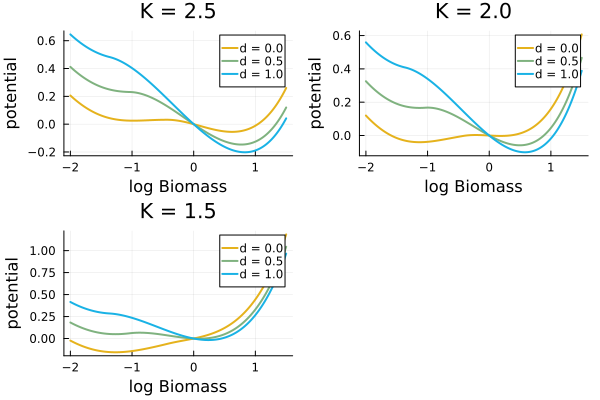

In [48]:
x = -2.0:0.01:1.5
F=0.48;d=0.0;c=4.5;r=1.0;K=2.5;f = broadcast(x->dxdt(x,r,K,c,k,d,h,F),x);f_ = integrate(x,f)
p1 = Plots.plot(x, -(f_.-f_[x.==0]), width = 2, color = "black",label ="d = 0.0",c = Colors.RGB(0.9,0.7,0.11),title = "K = 2.5")
F=0.48;d=0.0;c=4.5;r=1.0;K=2.0;f = broadcast(x->dxdt(x,r,K,c,k,d,h,F),x);f_ = integrate(x,f)
p2 = Plots.plot(x, -(f_.-f_[x.==0]), width = 2, color = "black",label ="d = 0.0",c = Colors.RGB(0.9,0.7,0.11),title = "K = 2.0")
F=0.48;d=0.0;c=4.5;r=1.0;K=1.5;f = broadcast(x->dxdt(x,r,K,c,k,d,h,F),x);f_ = integrate(x,f)
p3 = Plots.plot(x, -(f_.-f_[x.==0]), width = 2, color = "black",label ="d = 0.0" ,c = Colors.RGB(0.9,0.7,0.11),title = "K = 1.5")

F=0.3;d=0.0;c=4.5;r=1.0;K=2.5;f = broadcast(x->dxdt(x,r,K,c,k,d,h,F),x);f_ = integrate(x,f)
Plots.plot!(p1,x, -(f_.-f_[x.==0]), width = 2, color = "black",label ="d = 0.5",c = Colors.RGB(0.5,0.7,0.5))
F=0.3;d=0.0;c=4.5;r=1.0;K=2.0;f = broadcast(x->dxdt(x,r,K,c,k,d,h,F),x);f_ = integrate(x,f)
Plots.plot!(p2,x, -(f_.-f_[x.==0]), width = 2, color = "black",label ="d = 0.5",c = Colors.RGB(0.5,0.7,0.5))
F=0.3;d=0.0;c=4.5;r=1.0;K=1.5;f = broadcast(x->dxdt(x,r,K,c,k,d,h,F),x);f_ = integrate(x,f)
Plots.plot!(p3,x, -(f_.-f_[x.==0]), width = 2, color = "black",label ="d = 0.5" ,c = Colors.RGB(0.5,0.7,0.5))

F=0.2;d=0.0;c=4.5;r=1.0;K=2.5;f = broadcast(x->dxdt(x,r,K,c,k,d,h,F),x);f_ = integrate(x,f)
Plots.plot!(p1,x, -(f_.-f_[x.==0]), width = 2, color = "black",label ="d = 1.0",c = Colors.RGB(0.1,0.7,0.9))
F=0.2;d=0.0;c=4.5;r=1.0;K=2.0;f = broadcast(x->dxdt(x,r,K,c,k,d,h,F),x);f_ = integrate(x,f)
Plots.plot!(p2,x, -(f_.-f_[x.==0]), width = 2, color = "black",label ="d = 1.0",c = Colors.RGB(0.1,0.7,0.9))
F=0.2;d=0.0;c=4.5;r=1.0;K=1.5;f = broadcast(x->dxdt(x,r,K,c,k,d,h,F),x);f_ = integrate(x,f)
Plots.plot!(p3,x, -(f_.-f_[x.==0]), width = 2, color = "black",label ="d = 1.0",c = Colors.RGB(0.1,0.7,0.9))
plot(p1,p2,p3,ylabel="potential",xlabel = "log Biomass", legend = :topright)

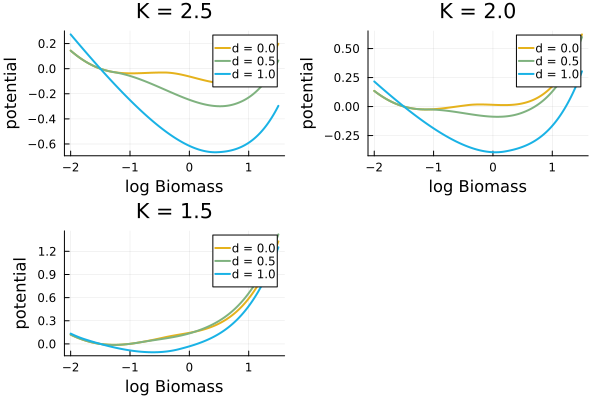

In [50]:
x = -2.0:0.01:1.5
F=0.48;d=0.0;c=4.5;r=1.0;K=2.5;f = broadcast(x->dxdt(x,r,K,c,k,d,h,F),x);f_ = integrate(x,f)
p1 = Plots.plot(x, -(f_.-f_[x.==x0]), width = 2, color = "black",label ="d = 0.0",c = Colors.RGB(0.9,0.7,0.11),title = "K = 2.5")
F=0.48;d=0.0;c=4.5;r=1.0;K=2.0;f = broadcast(x->dxdt(x,r,K,c,k,d,h,F),x);f_ = integrate(x,f)
p2 = Plots.plot(x, -(f_.-f_[x.==x0]), width = 2, color = "black",label ="d = 0.0",c = Colors.RGB(0.9,0.7,0.11),title = "K = 2.0")
F=0.48;d=0.0;c=4.5;r=1.0;K=1.5;f = broadcast(x->dxdt(x,r,K,c,k,d,h,F),x);f_ = integrate(x,f)
p3 = Plots.plot(x, -(f_.-f_[x.==x0]), width = 2, color = "black",label ="d = 0.0" ,c = Colors.RGB(0.9,0.7,0.11),title = "K = 1.5")

F=0.48;d=0.5;c=4.5;r=1.0;K=2.5;f = broadcast(x->dxdt(x,r,K,c,k,d,h,F),x);f_ = integrate(x,f)
Plots.plot!(p1,x, -(f_.-f_[x.==x0]), width = 2, color = "black",label ="d = 0.5",c = Colors.RGB(0.5,0.7,0.5))
F=0.48;d=0.5;c=4.5;r=1.0;K=2.0;f = broadcast(x->dxdt(x,r,K,c,k,d,h,F),x);f_ = integrate(x,f)
Plots.plot!(p2,x, -(f_.-f_[x.==x0]), width = 2, color = "black",label ="d = 0.5",c = Colors.RGB(0.5,0.7,0.5))
F=0.48;d=0.5;c=4.5;r=1.0;K=1.5;f = broadcast(x->dxdt(x,r,K,c,k,d,h,F),x);f_ = integrate(x,f)
Plots.plot!(p3,x, -(f_.-f_[x.==x0]), width = 2, color = "black",label ="d = 0.5" ,c = Colors.RGB(0.5,0.7,0.5))

F=0.48;d=1.0;c=4.5;r=1.0;K=2.5;f = broadcast(x->dxdt(x,r,K,c,k,d,h,F),x);f_ = integrate(x,f)
Plots.plot!(p1,x, -(f_.-f_[x.==x0]), width = 2, color = "black",label ="d = 1.0",c = Colors.RGB(0.1,0.7,0.9))
F=0.48;d=1.0;c=4.5;r=1.0;K=2.0;f = broadcast(x->dxdt(x,r,K,c,k,d,h,F),x);f_ = integrate(x,f)
Plots.plot!(p2,x, -(f_.-f_[x.==x0]), width = 2, color = "black",label ="d = 1.0",c = Colors.RGB(0.1,0.7,0.9))
F=0.48;d=1.0;c=4.5;r=1.0;K=1.5;f = broadcast(x->dxdt(x,r,K,c,k,d,h,F),x);f_ = integrate(x,f)
Plots.plot!(p3,x, -(f_.-f_[x.==x0]), width = 2, color = "black",label ="d = 1.0",c = Colors.RGB(0.1,0.7,0.9))
plot(p1,p2,p3,ylabel="potential",xlabel = "log Biomass", legend = :topright)

## Delayed feedback monitoring model

Bayesian update rule!
$$
\mu_{t+1} = \frac{\tau^2 \mu_t + \sigma_t^2 x_t}{\sigma_t^2+\tau^2} \\
\sigma_{t+1}^2 = \frac{\sigma_t^2 \tau^2}{\sigma_t^2 + \tau^2}
$$

differnce form 
$$
\Delta \mu_{t+1} =  \frac{\tau^2 \mu_t + \sigma_t^2 x_t}{\sigma_t^2+\tau^2}  - \mu_t\\ 
\Delta \mu_{t+1} = \frac{\tau^2}{\sigma_t^2+\tau^2}\mu_t - \mu_t + \frac{\sigma_t^2}{\sigma_t^2+\tau^2} x_t \\
\Delta \mu_{t+1} = \left(\frac{\tau^2}{\sigma_t^2+\tau^2} -1\right)\mu_t  + \frac{\sigma_t^2}{\sigma_t^2+\tau^2}x_t
$$

$$
\frac{\Delta \mu_{t+1}}{\Delta t} = \frac{\left(\frac{\tau^2}{\sigma_t^2+\tau^2} -1\right)\mu_t  + \frac{\sigma_t^2}{\sigma_t^2+\tau^2}x_t}{\Delta t}
$$

$$
\tau^2 = \frac{\sigma_{e}}{\Delta t}
$$

$$
\frac{\Delta \mu_{t+1}}{\Delta t} = \frac{\left(\frac{\frac{\sigma_{e}}{\Delta t}}{\sigma_t^2+\frac{\sigma_{e}}{\Delta t}} -1\right)\mu_t  + \frac{\sigma_t^2}{\sigma_t^2+\frac{\sigma_{e}}{\Delta t}}x_t}{\Delta t}
$$

$$
\frac{\Delta \mu_{t+1}}{\Delta t} = \left(\frac{\frac{\sigma_{e}}{\Delta t}}{\Delta t \sigma_t^2+\sigma_{e}} -\frac{1}{\Delta t}\right)\mu_t  + \frac{\sigma_t^2}{\Delta t\sigma_t^2+\sigma_{e}}x_t
$$

$$
\frac{d \mu}{d t} = -\frac{\sigma_t}{\sigma_e}\mu  + \frac{\sigma_t}{\sigma_e}x
$$



full model
$$
\frac{dx}{dt} = r\left(1-\frac{e^x}{K}\right) - \frac{F}{e^{\mu}} \\
\frac{d\mu}{dt} = -p\mu + px
$$

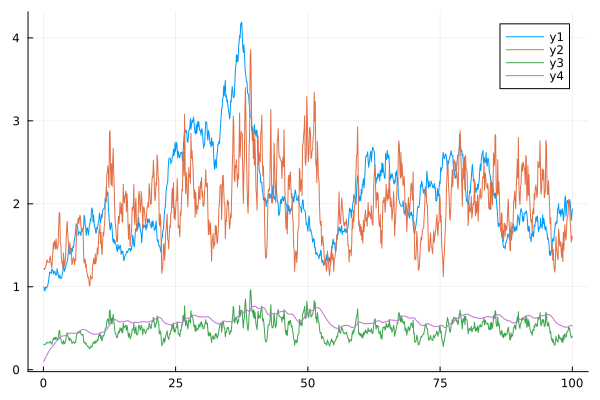

In [504]:
using Distributions
sigma = 0.3
function time_step(v,r,K,F,p,dt,sigma,tau)
    x = v[1]; u = v[2]; p = v[3]
    dx = r*(1-exp(x)/K) - F*exp(u)/exp(x) + rand(Normal(0,tau/sqrt(dt)))
    du = -p*u+p*(x + rand(Normal(0,sigma/sqrt(dt))))+r*(1-exp(u)/K) - F
    dp = -sigma*p + sigma*(F*exp(u)+tau)
    return [x+dt*dx,u+dt*du, p + dt*dp]
end 

function simulation(v0,T,r,K,F,p,dt,sigma)
    n_steps = round(Int,T/dt)
    t=[];x=[];u=[];p=[];v = v0
    for i in 1:n_steps
        push!(t,dt*i);push!(x,v[1]);push!(u,v[2]);push!(p,v[3])
        v .= time_step(v,r,K,F,p,dt,sigma,tau)  
    end 
    return t,x,u,p
end 
v0=[0.0,0.2,0.1];T=100;r=0.5;K=4.0;F=0.25;dt=0.1;sigma=0.5; tau = 0.1
t,x,u,p=simulation(v0,T,r,K,F,p,dt,sigma)
Plots.plot(t,exp.(x))
Plots.plot!(t,exp.(u))
Plots.plot!(t,F*exp.(u))
Plots.plot!(t,p)

In [435]:
using Distributions
time_step(v0,r,K,F,p,dt,sigma)

3-element Vector{Float64}:
 NaN
 NaN
 NaN

$$
\sigma_{t+1}^2 = \frac{\sigma_t^2 \tau^2}{\sigma_t^2 + \tau^2} + \nu^2
$$

$$
\sigma_t^2 \sigma_e^2 = (\sigma_{t}^2 - \nu^2)(\sigma_t^2 + \sigma_e^2)
$$

$$
\Delta \sigma_{t}^2 = \frac{\sigma_t^2 \sigma_e^2}{\sigma_t^2 + \sigma_e^2} + \nu^2 - \sigma_t^2
$$

$$
\Delta \sigma_{t}^2 = \left(\frac{ \sigma_e^2}{\sigma_t^2 + \sigma_e^2} - 1 \right) \sigma_t^2 + \nu^2 
$$